## Streprogen - Intermediate features

This notebook shows features of [streprogen](https://github.com/tommyod/streprogen), the Python strength program generator.

- [GitHub repository](https://github.com/tommyod/streprogen)
- [Python Package Index (PyPI)](https://pypi.org/project/streprogen/)
- [Report issues or make feature requests](https://github.com/tommyod/streprogen/issues)

Contributions to the code are welcome. :)

In [1]:
!pip install streprogen matplotlib --quiet --no-cache --upgrade

### Imports

In [2]:
import matplotlib.pyplot as plt
from streprogen import Program

### Long term planning - a very simple setup

Setting everything to **constant**, just to show how it works.

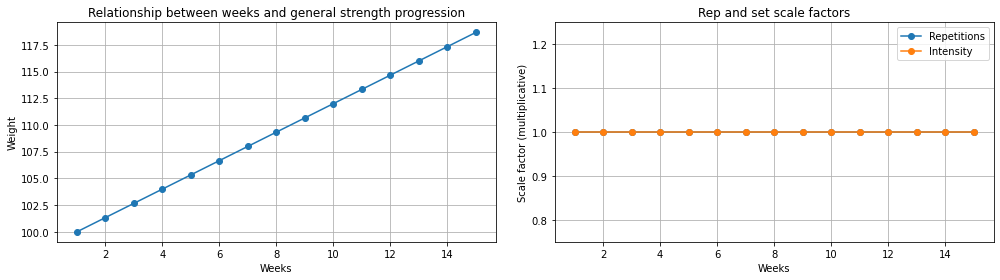

In [3]:
# We'll create a 16 week program, i.e. 4 months
duration = 16
weeks = list(range(1, duration))

from streprogen import progression_sinusoidal, progression_diffeq
import functools

plt.figure(figsize=(14, 4))

# ------------------------------------------------------

k = 0  # The non-linearity. k=0 is linear, as k gets higher progression becomes more non-linear
progression = functools.partial(progression_diffeq, k=k)

plt.subplot(1, 2, 1)
plt.title("Relationship between weeks and general strength progression")
plt.plot(
    weeks,
    progression(
        weeks, start_weight=100, final_weight=120, start_week=1, final_week=duration
    ),
    "-o",
)
plt.xlabel("Weeks")
plt.ylabel("Weight")
plt.grid()

# ------------------------------------------------------

period = 1
offset = 0  # The offset of the cycles
scale = 0.00
scale_repetitions = functools.partial(
    progression_sinusoidal,
    start_weight=1,
    final_weight=1,
    start_week=1,
    final_week=duration,
    period=period,
    scale=scale,
    offset=offset,
    k=0,
)


period = 1  # The number of cycles (sine waves) in the 16 weeks
offset = 0  # The offset of the cycles
scale = 0.00
scale_intensity = functools.partial(
    progression_sinusoidal,
    start_weight=1,
    final_weight=1,
    start_week=1,
    final_week=duration,
    period=period,
    scale=scale,
    offset=offset,
    k=0,
)

plt.subplot(1, 2, 2)
plt.title("Rep and set scale factors")
plt.plot(weeks, scale_repetitions(weeks), "-o", label="Repetitions")
plt.plot(weeks, scale_intensity(weeks), "-o", label="Intensity")
plt.legend()
plt.xlabel("Weeks")
plt.ylabel("Scale factor (multiplicative)")
plt.ylim([0.75, 1.25])
plt.grid()

plt.tight_layout()

## Progression functions - sinusoidal and sawtooth

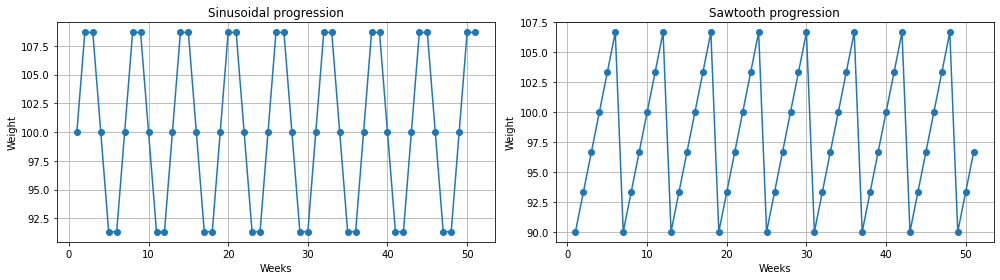

In [14]:
duration = 52
weeks = list(range(1, duration))

from streprogen import progression_sinusoidal, progression_sawtooth
import functools

plt.figure(figsize=(14, 4))

# ------------------------------------------------------

period = 6  # The period of a cycle (sine wave), measured in weeks
scale = 0.1  # The amplitude of each cycle (i.e. height)
offset = 0.0  # The offset of the cycles
k = 2  # The non-linearity. k=0 is linear, as k gets higher progression becomes more non-linear


progression = functools.partial(
    progression_sinusoidal, period=period, scale=scale, offset=offset, k=k
)

plt.subplot(1, 2, 1)
plt.title("Sinusoidal progression")
plt.plot(
    weeks,
    progression(
        weeks, start_weight=100, final_weight=100, start_week=1, final_week=duration
    ),
    "-o",
)
plt.xlabel("Weeks")
plt.ylabel("Weight")
plt.grid()



progression = functools.partial(
    progression_sawtooth, period=period, scale=scale, offset=offset, k=k
)

plt.subplot(1, 2, 2)
plt.title("Sawtooth progression")
plt.plot(
    weeks,
    progression(
        weeks, start_weight=100, final_weight=100, start_week=1, final_week=duration
    ),
    "-o",
)
plt.xlabel("Weeks")
plt.ylabel("Weight")
plt.grid()

plt.tight_layout()

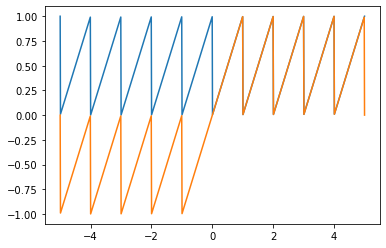

In [5]:
import numpy as np

x = np.linspace(-5, 5, num=1000)
fra, inte = np.modf(x + np.min(x))
fra = fra + 1

fra2, inte = np.modf(x) 

plt.plot(x, fra)

plt.plot(x, fra2)

### Long term planning - a more realistic setup

Using periodicity and non-linearity.

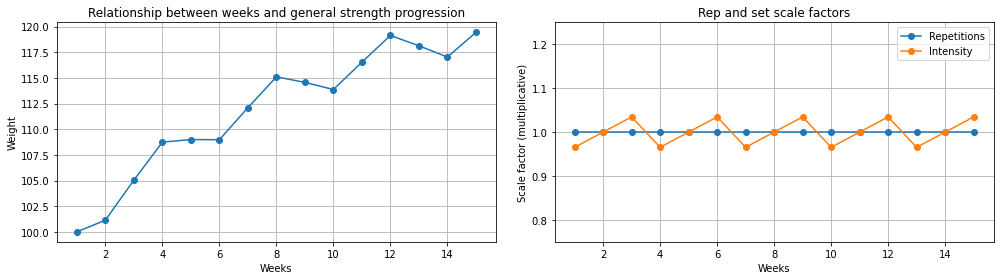

In [6]:
# We'll create a 16 week program, i.e. 4 months
duration = 16
weeks = list(range(1, duration))

from streprogen import progression_sinusoidal
import functools

plt.figure(figsize=(14, 4))

# ------------------------------------------------------

period = 4  # The period of a cycle (sine wave), measured in weeks
scale = 0.015  # The amplitude of each cycle (i.e. height)
offset = 2  # The offset of the cycles
k = 2  # The non-linearity. k=0 is linear, as k gets higher progression becomes more non-linear
progression = functools.partial(
    progression_sinusoidal, period=period, scale=scale, offset=offset, k=k
)

plt.subplot(1, 2, 1)
plt.title("Relationship between weeks and general strength progression")
plt.plot(
    weeks,
    progression(
        weeks, start_weight=100, final_weight=120, start_week=1, final_week=duration
    ),
    "-o",
)
plt.xlabel("Weeks")
plt.ylabel("Weight")
plt.grid()

# ------------------------------------------------------

period = 2  # The number of cycles (sine waves) in the 16 weeks
scale = 0.2  # If the baseline is 25 reps/exercise, scale of 0.2 means we can go between 20 and 30
offset = 0  # The offset of the cycles
scale_repetitions = functools.partial(
    progression_sinusoidal,
    start_weight=1,
    final_weight=1,
    start_week=1,
    final_week=duration,
    period=period,
    scale=scale,
    offset=offset,
    k=0,
)

period = 3  # The number of cycles (sine waves) in the 16 weeks
offset = 4  # The offset of the cycles
scale = 0.04  # If the baseline is an intensity of 80%, scale of 0.04 means approx between 76 and 84
scale_intensity = functools.partial(
    progression_sinusoidal,
    start_weight=1,
    final_weight=1,
    start_week=1,
    final_week=duration,
    period=period,
    scale=scale,
    offset=offset,
    k=0,
)

plt.subplot(1, 2, 2)
plt.title("Rep and set scale factors")
plt.plot(weeks, scale_repetitions(weeks), "-o", label="Repetitions")
plt.plot(weeks, scale_intensity(weeks), "-o", label="Intensity")
plt.legend()
plt.xlabel("Weeks")
plt.ylabel("Scale factor (multiplicative)")
plt.ylim([0.75, 1.25])
plt.grid()

plt.tight_layout()

### Program setup

In [7]:
program = Program(
    name="AdvancedFeatures",  # The name of the training program
    duration=duration,  # The duration of the training program in weeks.
    units="kg",  # Units for the weights, typically 'kg', 'lbs' or '' (empty)
    round_to=5,  # What the weights are rounded to.
    # Use the functions above
    reps_per_exercise=25,
    rep_scaler_func=scale_repetitions,
    intensity=80,
    intensity_scaler_func=scale_intensity,
    progression_func=progression,
)


with program.Day("Day 1"):
    program.DynamicExercise(name="Bench", start_weight=80, min_reps=2, max_reps=8)
    program.DynamicExercise(name="Squats", start_weight=100, min_reps=2, max_reps=8)
    program.StaticExercise("Curls", "3 x 12")

with program.Day("Day 2"):
    program.DynamicExercise(name="Deadlifts", start_weight=100, min_reps=2, max_reps=8)
    program.DynamicExercise(name="Squats", start_weight=90, min_reps=2, max_reps=8)

### Render the program

In [8]:
# Do the computations and render a program. Might take a few seconds.
program.render()

### Print and save the program

In [9]:
print(program)

----------------------------------------------------------------
Program: AdvancedFeatures

Program parameters
  duration: 16
  reps_per_exercise: 25
  intensity: 80
  units: kg
----------------------------------------------------------------
Exercise information
  Day 1
   Bench        80kg -> 99.2kg 
    reps: [2, 8]   weekly inc.: 1.5%
   Squats      100kg -> 124.0kg
    reps: [2, 8]   weekly inc.: 1.5%
   Curls       3 x 12
  Day 2
   Deadlifts   100kg -> 124.0kg
    reps: [2, 8]   weekly inc.: 1.5%
   Squats       90kg -> 111.6kg
    reps: [2, 8]   weekly inc.: 1.5%
----------------------------------------------------------------
Program
 Week 1
  Day 1
   Bench       7 x 60kg   7 x 60kg   6 x 65kg   6 x 65kg   
   Squats      7 x 75kg   7 x 75kg   6 x 80kg   6 x 80kg   
   Curls       3 x 12

  Day 2
   Deadlifts   7 x 75kg   7 x 75kg   6 x 80kg   6 x 80kg   
   Squats      7 x 70kg   7 x 70kg   6 x 70kg   6 x 70kg   

 Week 2
  Day 1
   Bench       7 x 60kg   7 x 60kg   5 x 65kg

### Export the program as `.html` or `.tex`, then to `.pdf`

A `.html` file can be printed directly from your browser, or printed to a `.pdf` from your browser.

In [10]:
# Save the program as a HTML file
with open("AdvancedFeatures.html", "w", encoding="utf-8") as file:
    # Control table width (number of sets) by passing the 'table_width' argument
    file.write(program.to_html(table_width=6))

Use a `.tex` to generate `.pdf` if you have LaTEX installed, or use:
    
- [latexbase.com](https://latexbase.com/) from your browser.

In [11]:
# If you have LaTeX installed on your system, you can render a program to .tex
# Alternatively, you can paste the LaTeX into: https://latexbase.com/
print(program.to_tex(table_width=6))

% -----------------------------------------------
% Package imports
% -----------------------------------------------
\documentclass[12pt, a4paper]{article}% 'twoside' for printing
\usepackage[utf8]{inputenc}% Allow input to be UTF-8
\usepackage[margin = 2cm]{geometry}% May be used to set margins

% -----------------------------------------------
% Document start
% -----------------------------------------------

\begin{document}
\large

\section*{Program: AdvancedFeatures}

This program was made using \verb|streprogen|,
the Python strength program generator.
The latest version can be found at \\
\verb|https://pypi.python.org/pypi/streprogen/|.


\section*{Program parameters}
\begin{tabular}{l|l}
	\textbf{Parameter} & \textbf{Value} \\ \hline
	\verb|duration|             & 16 \\
	\verb|reps_per_exercise|    & 25 \\
	\verb|intensity|            & 80 \\
	\verb|units|                & kg
\end{tabular}


\section*{Exercise information}
\begin{tabular}{llllll}
    \textbf{Exercise} & \textb